In [27]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten , Dropout , Dense , Conv2D , MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single = x_train[4]
single

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

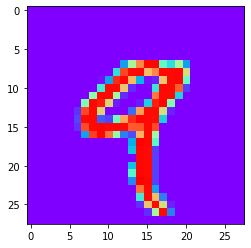

In [6]:
plt.imshow(single , cmap = 'rainbow')

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
y_example = to_categorical(y_train)
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [9]:
y_cat_test = to_categorical(y_test,10)
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
y_cat_train = to_categorical(y_train,10)
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [11]:
x_train = x_train/255
x_test = x_test/255

In [12]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [13]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [14]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000 , 28 , 28 , 1)

In [15]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [21]:
model = Sequential()

In [25]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [28]:
early_stop = EarlyStopping(monitor = 'val_loss' , patience = 2)

In [31]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 26s 439us/sample - loss: 0.1343 - accuracy: 0.9598 - val_loss: 0.0545 - val_accuracy: 0.9834
Epoch 2/10
60000/60000 [==============================] - 21s 355us/sample - loss: 0.0471 - accuracy: 0.9849 - val_loss: 0.0441 - val_accuracy: 0.9848
Epoch 3/10
60000/60000 [==============================] - 21s 354us/sample - loss: 0.0299 - accuracy: 0.9909 - val_loss: 0.0455 - val_accuracy: 0.9839
Epoch 4/10
60000/60000 [==============================] - 21s 357us/sample - loss: 0.0211 - accuracy: 0.9931 - val_loss: 0.0378 - val_accuracy: 0.9887
Epoch 5/10
60000/60000 [==============================] - 22s 362us/sample - loss: 0.0144 - accuracy: 0.9953 - val_loss: 0.0389 - val_accuracy: 0.9890
Epoch 6/10
60000/60000 [==============================] - 24s 402us/sample - loss: 0.0109 - accuracy: 0.9965 - val_loss: 0.0386 - val_accuracy: 0.9900


In [32]:
model.metrics_names

['loss', 'accuracy']

In [33]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.134260,0.959817,0.054533,0.9834
1,0.047071,0.984917,0.044097,0.9848
2,0.029910,0.990950,0.045485,0.9839
3,0.021079,0.993083,0.037833,0.9887
4,0.014447,0.995283,0.038903,0.9890
5,0.010939,0.996500,0.038630,0.9900


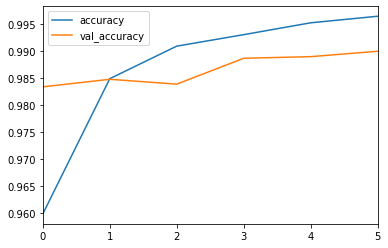

In [34]:
losses[['accuracy','val_accuracy']].plot()

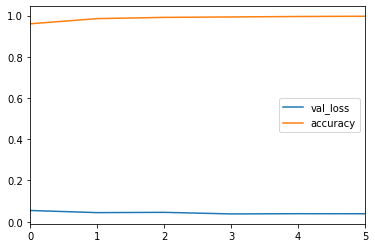

In [36]:
losses[['val_loss' , 'accuracy']].plot()

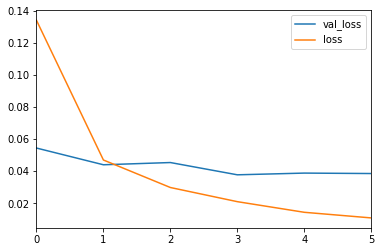

In [37]:
losses[['val_loss' , 'loss']].plot()

In [38]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.0386296179098239, 0.99]


In [39]:
from sklearn.metrics import confusion_matrix , classification_report

In [40]:
predictions = model.predict_classes(x_test)

In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [42]:
confusion_matrix(y_test,predictions)

array([[ 977,    0,    0,    1,    0,    0,    1,    0,    1,    0],
       [   0, 1132,    0,    2,    1,    0,    0,    0,    0,    0],
       [   0,    2, 1019,    2,    2,    0,    1,    5,    1,    0],
       [   0,    0,    0, 1006,    0,    2,    0,    0,    2,    0],
       [   0,    0,    0,    0,  977,    0,    1,    0,    0,    4],
       [   1,    0,    0,    8,    0,  881,    1,    0,    0,    1],
       [   4,    3,    0,    1,    3,    2,  940,    0,    5,    0],
       [   0,    2,    3,    1,    1,    0,    0, 1014,    1,    6],
       [   4,    0,    1,    2,    0,    1,    0,    2,  960,    4],
       [   1,    0,    0,    3,    8,    0,    0,    2,    1,  994]],
      dtype=int64)

In [43]:
import seaborn as sns

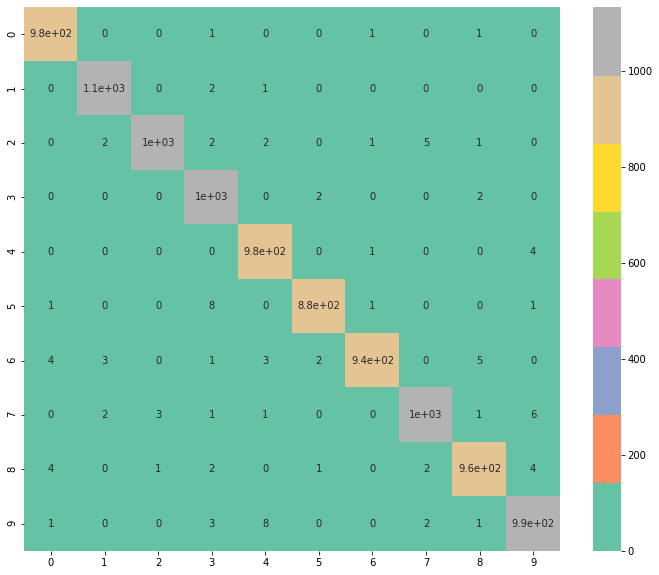

In [47]:
plt.figure(figsize = (12 , 10))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True , cmap = 'Set2')

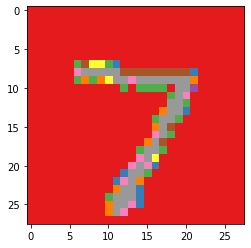

In [51]:
my_number = x_test[0]
plt.imshow(my_number.reshape(28,28) , cmap = 'Set1')

In [49]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)